![title](UCN ICI.png)

 #  <font color= #007FFF> K-mean Algorithm </font>

<div class="alert alert-info"> </h4> **Material preparado para el Master en Ingeniería Civil Industrial | Universidad Católica del Norte | Antofasta | Curso - Predictive Analytics.**
</h4> </div>

**K-medias es un método de agrupamiento**, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en data science.

La agrupación del conjunto de datos puede ilustrarse en una partición del espacio de datos en celdas de Voronoi.

El problema es computacionalmente difícil (**NP-hard**). Sin embargo, hay eficientes heurísticas que se emplean comúnmente y convergen rápidamente a un óptimo local. Estos suelen ser similares a los algoritmos expectation-maximization de mezclas de distribuciones gausianas por medio de un enfoque de refinamiento iterativo empleado por ambos algoritmos. Además, los dos algoritmos usan los centros que los grupos utilizan para modelar los datos, sin embargo **k-medias** tiende a encontrar grupos de extensión espacial comparable, mientras que el mecanismo expectation-maximization permite que los grupos tengan formas diferentes.
Fuente: [Wikipedia](https://es.wikipedia.org/wiki/K-medias)


## **Problema**



Dado un conjunto de observaciones $(x_1, x_2, …, x_n)$, donde cada observación es un vector real de $d$ dimensiones, **k-medias** construye una partición de las observaciones en $k$ conjuntos $(k \leq n)$ a fin de **minimizar la suma de los cuadrados dentro de cada grupo** (WCSS): S = {S1, S2, …, Sk}

\begin{equation}
Min\;Z=\displaystyle\sum_{i=1}^{k}\displaystyle\sum_{x_{i}\in S_i}^{}|| x_i-\mu_i ||^{2}
\end{equation}
Donde $\mu_i$ es la media de los puntos en $s_i$

<img src="kmeanx.png" width="500" height="500" />


## **Agenda**
- Ejemplo simple utilizando Scikit-learn
- Clasificando Estudiantes

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# Creando los datos.
data=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[1,10],[1.5,9],[0.5,9.5]])
data

array([[  1. ,   2. ],
       [  1.5,   1.8],
       [  5. ,   8. ],
       [  8. ,   8. ],
       [  1. ,   0.6],
       [  9. ,  11. ],
       [  1. ,  10. ],
       [  1.5,   9. ],
       [  0.5,   9.5]])

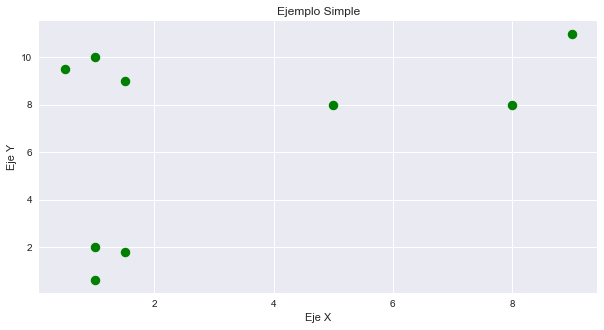

In [3]:
x=data[:,0]
y=data[:,1]
sns.set(style='darkgrid')

plt.figure(figsize=(10,5))
plt.scatter(x,y,s=20,linewidths=5,zorder=1,color='green')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Ejemplo Simple')
plt.show()

In [4]:
k_mean=KMeans(n_clusters=3)
k_mean.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
centroids=k_mean.cluster_centers_
labels=k_mean.labels_
print(centroids)
print(labels)

[[ 1.16666667  1.46666667]
 [ 7.33333333  9.        ]
 [ 1.          9.5       ]]
[0 0 1 1 0 1 2 2 2]


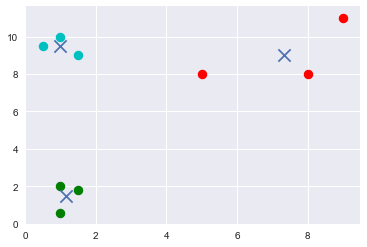

In [6]:
color=['green','red','c','y']
sns.set(style='darkgrid')

for i in range(len(data)):
    plt.scatter(x[i],y[i],s=20,linewidths=5,zorder=1,color=color[labels[i]])

plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s=150, linewidths = 5, zorder = 10),
plt.show()

In [7]:
Cluster_1=[]
Cluster_2=[]
Cluster_3=[]

for n in range(len(data)):
    
    if labels[n]==0:
        Cluster_1.append(data[n])
    elif labels[n]==1:
        Cluster_2.append(data[n])
    elif labels[n]==2:
        Cluster_3.append(data[n])
print(Cluster_1)
print('')
print(Cluster_2) 
print('')
print(Cluster_3) 

[array([ 1.,  2.]), array([ 1.5,  1.8]), array([ 1. ,  0.6])]

[array([ 5.,  8.]), array([ 8.,  8.]), array([  9.,  11.])]

[array([  1.,  10.]), array([ 1.5,  9. ]), array([ 0.5,  9.5])]


In [24]:
#Notas Exemplos: Ejemplo con estudiantes.

In [25]:
excel=pd.ExcelFile('Notas Examples - UCN.xlsx')
data =pd.read_excel(excel,'Data')
data = data.drop('ID Studiantes', 1)
data.head()

,Nota Io2,Nº Io2,Nota Produ2,Nº Produ2
0,3.9,2,3.0,1
1,4.0,1,4.9,1
2,3.8,2,3.5,2
3,4.6,1,2.4,1
4,4.0,1,4.6,1


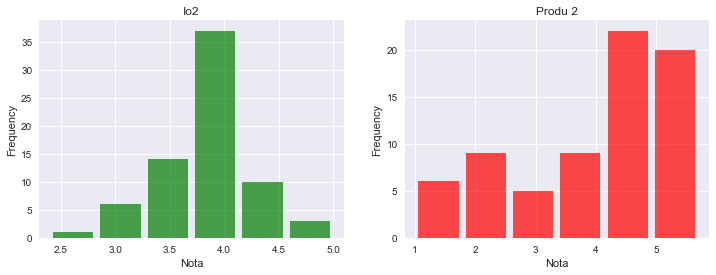

In [26]:

io2=data['Nota Io2']
prod2=data['Nota Produ2']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(x=io2, bins=6, color='green',alpha=0.7, rwidth=0.85)
plt.title('Io2')
plt.xlabel('Nota')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(x=prod2, bins=6, color='red',alpha=0.7, rwidth=0.85)
plt.xlabel('Nota')
plt.ylabel('Frequency')
plt.title('Produ 2')

plt.show()

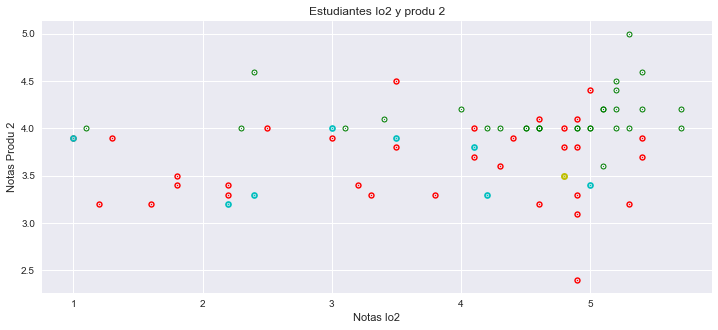

In [27]:
color=['black','green','red','c','y','white']
sns.set(style='darkgrid')

plt.figure(figsize=(12,5))
for i in range(len(data)):
    plt.scatter(data.iloc[i][2],data.iloc[i][0],s=data.iloc[i][1],linewidths=5,zorder=1,
                color=color[int(data.iloc[i][1])])

plt.xlabel('Notas Io2')
plt.ylabel('Notas Produ 2')
plt.title('Estudiantes Io2 y produ 2')
plt.show()

In [28]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

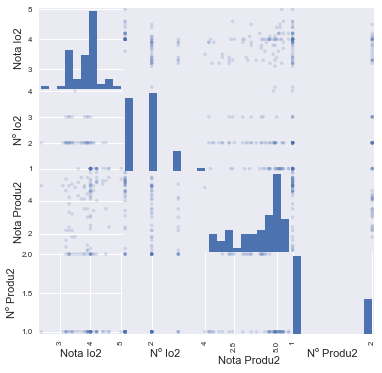

In [29]:
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

In [30]:
k_mean=KMeans(n_clusters=5)
k_mean.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
labels=k_mean.labels_
labels

array([4, 1, 4, 0, 1, 4, 1, 4, 2, 3, 1, 3, 2, 4, 3, 1, 2, 2, 1, 4, 4, 4, 3,
       2, 1, 4, 3, 1, 2, 4, 2, 4, 1, 4, 1, 1, 3, 3, 2, 2, 3, 3, 3, 2, 4, 4,
       2, 3, 1, 1, 3, 3, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 4, 1, 1, 0,
       1, 3], dtype=int32)

In [32]:
centroids_2=k_mean.cluster_centers_
centroids_2

array([[ 4.15      ,  1.        ,  3.23333333,  1.83333333],
       [ 4.13478261,  1.        ,  5.03478261,  1.        ],
       [ 3.55384615,  2.15384615,  1.71538462,  1.38461538],
       [ 3.55714286,  2.21428571,  4.97142857,  1.        ],
       [ 3.76666667,  2.26666667,  3.77333333,  1.8       ]])

In [33]:
centroids_2[:,2]

array([ 3.23333333,  5.03478261,  1.71538462,  4.97142857,  3.77333333])

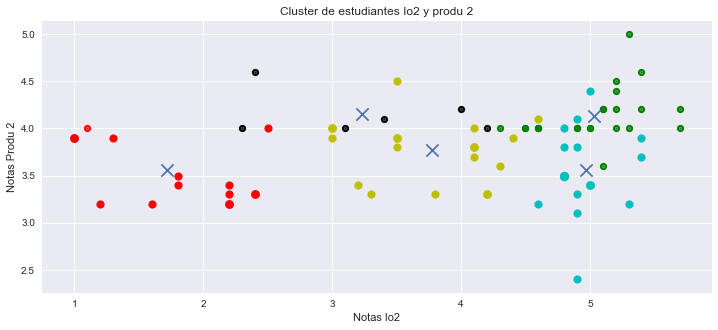

In [34]:
color=['black','green','red','c','y','white']
sns.set(style='darkgrid')
plt.figure(figsize=(12,5))

for i in range(len(data)):
    plt.scatter(data.iloc[i][2],data.iloc[i][0],s=data.iloc[i][1]*5,linewidths=5,zorder=1,color=color[labels[i]])

plt.scatter(centroids_2[:,2],centroids_2[:,0], marker = "x", s=150, linewidths = 5, zorder = 10),

plt.xlabel('Notas Io2')
plt.ylabel('Notas Produ 2')
plt.title('Cluster de estudiantes Io2 y produ 2')
plt.show()

In [35]:
data['Estudiante']=''
for n in range(len(data)):
    data.at[n,'Estudiante']=labels[n]
data.head()

,Nota Io2,Nº Io2,Nota Produ2,Nº Produ2,Estudiante
0,3.9,2,3.0,1,4
1,4.0,1,4.9,1,1
2,3.8,2,3.5,2,4
3,4.6,1,2.4,1,0
4,4.0,1,4.6,1,1


In [36]:
Resumen=data.groupby(['Estudiante']).mean()
Resumen

,Nota Io2,Nº Io2,Nota Produ2,Nº Produ2
Estudiante,,,,
0,4.150000,1.000000,3.233333,1.833333
1,4.134783,1.000000,5.034783,1.000000
2,3.553846,2.153846,1.715385,1.384615
3,3.557143,2.214286,4.971429,1.000000
4,3.766667,2.266667,3.773333,1.800000


In [37]:
from sklearn import preprocessing
#X_normalized = preprocessing.normalize(data, norm='l2')
X_scaled = preprocessing.scale(data)

k_mean=KMeans(n_clusters=5)
k_mean.fit(X_scaled)
labels=k_mean.labels_

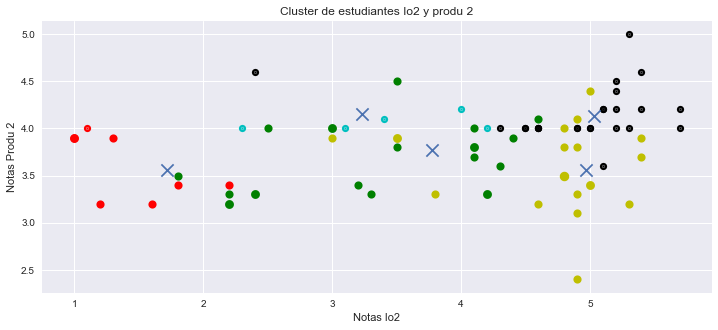

In [38]:
color=['black','green','red','c','y','white']
sns.set(style='darkgrid')
plt.figure(figsize=(12,5))

for i in range(len(data)):
    plt.scatter(data.iloc[i][2],data.iloc[i][0],s=data.iloc[i][1]*5,linewidths=5,zorder=1,color=color[labels[i]])

plt.scatter(centroids_2[:,2],centroids_2[:,0], marker = "x", s=150, linewidths = 5, zorder = 10),

plt.xlabel('Notas Io2')
plt.ylabel('Notas Produ 2')
plt.title('Cluster de estudiantes Io2 y produ 2')
plt.show()

In [39]:
data['Estudiante Normalized']=''
for n in range(len(data)):
    data.at[n,'Estudiante Normalized']=labels[n]
data.head()

,Nota Io2,Nº Io2,Nota Produ2,Nº Produ2,Estudiante,Estudiante Normalized
0,3.9,2,3.0,1,4,4
1,4.0,1,4.9,1,1,0
2,3.8,2,3.5,2,4,1
3,4.6,1,2.4,1,0,0
4,4.0,1,4.6,1,1,0


In [40]:
display(Resumen)
Resumen=data.groupby(['Estudiante Normalized']).mean()
Resumen

,Nota Io2,Nº Io2,Nota Produ2,Nº Produ2
Estudiante,,,,
0,4.150000,1.000000,3.233333,1.833333
1,4.134783,1.000000,5.034783,1.000000
2,3.553846,2.153846,1.715385,1.384615
3,3.557143,2.214286,4.971429,1.000000
4,3.766667,2.266667,3.773333,1.800000


,Nota Io2,Nº Io2,Nota Produ2,Nº Produ2
Estudiante Normalized,,,,
0,4.154167,1.000000,4.925000,1.0
1,3.688235,2.294118,3.376471,2.0
2,3.612500,2.000000,1.400000,1.0
3,4.060000,1.000000,3.400000,2.0
4,3.582353,2.235294,4.700000,1.0
